In [2]:
%matplotlib inline
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv').dropna()

In [4]:
pd.options.display.max_columns = 31
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.80850,144.99640,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,2.0,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.80900,144.99760,Northern Metropolitan,4019.0
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,3.0,2.0,1.0,113.0,110.0,1880.0,Yarra City Council,-37.80560,144.99300,Northern Metropolitan,4019.0


In [5]:
list(df.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [6]:
df.Price.describe()

count    8.887000e+03
mean     1.092902e+06
std      6.793819e+05
min      1.310000e+05
25%      6.410000e+05
50%      9.000000e+05
75%      1.345000e+06
max      9.000000e+06
Name: Price, dtype: float64

There are just over 27,000 recipes with an average price of $1,050,173.

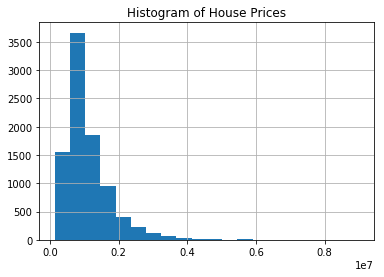

In [7]:
df.Price.hist(bins=20)
plt.title('Histogram of House Prices')
plt.show()

In [8]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [9]:
X = df.drop(['Address', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount', 'Landsize', 'Bedroom2'], 1)
Y = df.Price
df = df.drop(['Address', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount', 'Landsize', 'Bedroom2'], 1)

In [10]:
from scipy.stats import pearsonr
# If price_binary is True, then the house price is equal to or higher than the mean
df['price_binary'] = df['Price'] >=1.050173e+06
df[['Price', 'price_binary']].dropna()

,Price,price_binary
2,1035000.0,False
4,1465000.0,True
6,1600000.0,True
11,1876000.0,True
14,1636000.0,True
18,1097000.0,True
24,1350000.0,True
25,750000.0,False
30,1310000.0,True
32,1200000.0,True


In [11]:
X = df.drop(['Price', 'price_binary'], 1)

In [12]:
# Map low-volume sellers to another category
def map_seller(name, happy_set):
    if (name in happy_set):
        return name
    else:
        return 'other'
    
df_trans = df.copy()
sellers = (df_trans['SellerG'].value_counts()>100).reset_index()
sellers = sellers[sellers['SellerG']==True]
seller_names = sellers['index'].tolist()
df_trans['SellerG'] = df_trans['SellerG'].apply(lambda x: map_seller(x, seller_names))

In [13]:
# Let's see if throwing away lots of features helps at all (probably won't)
df_reduced = df.drop(['SellerG', 'Suburb', 'Regionname'], axis=1)

In [14]:
df_reduced.columns.values

array(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bathroom', 'Car',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'price_binary'],
      dtype=object)

In [15]:
# Create Features -- doing this in one place makes it easy to re-run
# Dummies will be created on all the categorical data and will ignore numerical data
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

y = df['Price']
X_trans = pd.get_dummies(df_trans.drop('Price', axis=1))
X_reduced = pd.get_dummies(df_reduced.drop('Price', axis=1))
X_reduced_PCA = pca.fit_transform(X_trans)

In [16]:
# Here I am defining some models to be used for regression along with some other things
# for my sim
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
lin = LinearRegression()
kn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
X_big = [X_trans, X_reduced, X_reduced_PCA]
methods_big = [lin, kn, gb, rf]

In [17]:
# df_results will store my cross-validation results for each combination of data/method
# I am doing two loops, one over method, another over the data source
# The _name variables are just for making the dataframe labels pretty

df_results = pd.DataFrame()
methods_name = ['OLS', 'KN', 'GradBoost', 'RF']
data_name = ['full', 'trans', 'reduced', 'reduced_PCA']
for didx in range(0, len(X_big)):
    for midx in range(0, len(methods_big)):
        # For the given method (lin, kn) and the data (full, trans, reduced)
        # Do a 5 fold cross-validation and average the results together and store in "res"
        res = np.mean(cross_val_score(methods_big[midx],
                                      X=X_big[didx],
                                      y=y,
                                      cv=5))
        # Add the simulation results to the df_results frame
        # The pd.DataFrame in the middle creates a one-line dataframe with the right info
        # The .append adds that new frame to the df_results frame
        df_results = df_results.append(pd.DataFrame({'method': [methods_name[midx]],
                                                     'data': [data_name[didx]],
                                                     'cv_res': [res]}))

In [18]:
# Now we can look at the results for each combination of data and method
# The trans data frame where we mappped sellers is winning
# Boosting > RF > OLS > KN
# PCA is not working well at all
df_results.sort_values(by='cv_res', ascending=False)

,cv_res,data,method
0,8.013685e-01,full,GradBoost
0,8.003542e-01,full,RF
0,7.916573e-01,trans,GradBoost
0,7.872253e-01,trans,RF
0,7.046062e-01,trans,OLS
0,6.381554e-01,reduced,GradBoost
0,6.051828e-01,reduced,RF
0,5.420177e-01,full,KN
0,5.337845e-01,trans,KN
0,5.274318e-01,reduced,OLS


In [24]:
GradientBoostingRegressor(X)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1,
             loss=                  Suburb  Rooms Type Method    SellerG  Distance  Bathroom  \
2             Abbotsford      2    h      S     Biggin       2.5       1.0
4             Abbotsford      3    h     SP     Biggin       2.5       2.0
6             Abbotsford      4    h     VB     Nelson       ...
34854        Western Metropolitan
34856        Western Metropolitan

[8887 rows x 12 columns],
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)